In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_rows = 20

In [4]:
df = pd.read_csv('../../data/epa_hap_daily_summary.csv.gz')
display(df.sample(10000).describe(include='all'))

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,pollutant_standard,date_local,units_of_measure,event_type,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,0.0,10000,10000,10000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,0.0,10000.00000,10000,8409,9988,10000,10000,10000,8801,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,41,7,NaN,3045,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,973,1282,54,509,578,325,310
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGS84,Arsenic PM2.5 LC,24 HOUR,NaN,2007-08-04,Parts per billion Carbon,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,Houston Deer Park #2,4514 1/2 Durant St,Texas,Harris,Not in a city,Houston-The Woodlands-Sugar Land TX,2013-06-11
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6592,788,9507,NaN,16,4643,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1633,92,92,1255,353,2395,417,3306
mean,29.37300,89.086000,1382.762200,60803.387300,2.871900,38.211307,-94.280519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614900,98.85060,0.416092,0.538688,0.735100,NaN,416.63070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,16.35163,99.281885,2759.493652,25698.945642,2.792252,5.876397,16.976561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.951779,8.32781,2.557237,3.553684,3.284815,NaN,331.38619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,1.000000,1.000000,12103.000000,1.000000,0.000000,-160.508331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.00000,-0.005000,-0.005000,0.000000,NaN,89.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16.00000,27.000000,8.000000,43804.000000,1.000000,33.999580,-106.821000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.00000,0.000000,0.000000,0.000000,NaN,123.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,29.00000,63.000000,42.000000,45201.000000,1.000000,38.923323,-92.530037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.00000,0.000960,0.000960,0.000000,NaN,175.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,45.00000,119.000000,1007.000000,88112.000000,5.000000,42.139996,-80.785683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.00000,0.040000,0.040000,0.000000,NaN,801.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pollutants = df['parameter_name'].value_counts()
display(pollutants)

Lead PM2.5 LC            600171
Nickel PM2.5 LC          600150
Manganese PM2.5 LC       599855
Chromium PM2.5 LC        598372
Arsenic PM2.5 LC         598221
                          ...  
Chromium VI (TSP) STP     23277
Acrolein - Verified       14086
Mercury PM10 STP          12528
Beryllium PM2.5 LC         1565
Chromium VI (TSP) LC        948
Name: parameter_name, Length: 41, dtype: int64

In [6]:
df['parameter_name'] = df['parameter_name'].str.split().apply(lambda x: x[0])
common_names = df['parameter_name'].value_counts()
display(common_names)

Chromium        787467
Nickel          766361
Manganese       762408
Arsenic         760582
Lead            657460
                 ...  
Formaldehyde    172991
Acetaldehyde    169218
Beryllium       117091
Acrolein        105354
Mercury          12528
Name: parameter_name, Length: 24, dtype: int64

In [8]:
df = pd.get_dummies(df, columns=['parameter_name'])
pollutant_columns = [
    c for c in df.columns if c.startswith('parameter_name_')]
display(pollutant_columns)

['parameter_name_1122-Tetrachloroethane',
 'parameter_name_12-Dichloropropane',
 'parameter_name_13-Butadiene',
 'parameter_name_Acetaldehyde',
 'parameter_name_Acrolein',
 'parameter_name_Arsenic',
 'parameter_name_Benzene',
 'parameter_name_Beryllium',
 'parameter_name_Cadmium',
 'parameter_name_Carbon',
 'parameter_name_Chloroform',
 'parameter_name_Chromium',
 'parameter_name_Dichloromethane',
 'parameter_name_Ethylene',
 'parameter_name_Formaldehyde',
 'parameter_name_Lead',
 'parameter_name_Manganese',
 'parameter_name_Mercury',
 'parameter_name_Nickel',
 'parameter_name_Tetrachloroethylene',
 'parameter_name_Trichloroethylene',
 'parameter_name_Vinyl',
 'parameter_name_cis-13-Dichloropropene',
 'parameter_name_trans-13-Dichloropropene']

In [10]:
for c in pollutant_columns:
    mask = df[c].astype(bool)
    pollutant = c[len('parameter_name_'):]
    # df[c][mask] = df[c][mask].copy() * df['arithmetic_mean'][mask].copy()
display(df.head())

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,sample_duration,pollutant_standard,date_local,units_of_measure,event_type,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change,parameter_name_1122-Tetrachloroethane,parameter_name_12-Dichloropropane,parameter_name_13-Butadiene,parameter_name_Acetaldehyde,parameter_name_Acrolein,parameter_name_Arsenic,parameter_name_Benzene,parameter_name_Beryllium,parameter_name_Cadmium,parameter_name_Carbon,parameter_name_Chloroform,parameter_name_Chromium,parameter_name_Dichloromethane,parameter_name_Ethylene,parameter_name_Formaldehyde,parameter_name_Lead,parameter_name_Manganese,parameter_name_Mercury,parameter_name_Nickel,parameter_name_Tetrachloroethylene,parameter_name_Trichloroethylene,parameter_name_Vinyl,parameter_name_cis-13-Dichloropropene,parameter_name_trans-13-Dichloropropene
0,42,125,5001,88103,5,40.445278,-80.420833,WGS84,24 HOUR,NaN,2005-12-30,Micrograms/cubic meter (LC),None,1,100.0,0.003000,0.00300,0,NaN,811,Met OneSASS Teflon - Energy dispersive XRF,NaN,HILLMAN STATE PARK - KINGS CREEK ROAD,Pennsylvania,Washington,Not in a city,Pittsburgh PA,2015-07-22,0.0,0.0,0.0,0.0,0.0,0.003,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,48,439,1002,43843,15,32.805818,-97.356568,WGS84,24 HOUR,NaN,2013-09-19,Parts per billion Carbon,None,1,100.0,0.000000,0.00000,0,NaN,175,Passivated Canister - Cryogenic Preconcentrati...,Fort Worth Northwest,3317 Ross Ave,Texas,Tarrant,Fort Worth,Dallas-Fort Worth-Arlington TX,2014-03-25,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,22,127,9000,88128,1,32.057581,-92.435157,WGS84,24 HOUR,NaN,2001-11-12,Micrograms/cubic meter (LC),None,1,100.0,0.002280,0.00228,0,NaN,802,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,NaN,Sikes,Louisiana,Winn,Not in a city,NaN,2015-07-22,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00228,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,18,89,22,45201,1,41.606680,-87.304729,WGS84,1 HOUR,NaN,2016-05-23,Parts per billion Carbon,None,23,96.0,0.413913,1.40000,2,NaN,128,PRECONCENTRATION TRAP - PE 8700;AUTO GC;SUBAMB...,Gary-IITRI/ 1219.5 meters east of Tennessee St...,201 MISSISSIPPI ST. IITRI BUNKER,Indiana,Lake,Gary,Chicago-Naperville-Elgin IL-IN-WI,2017-02-20,0.0,0.0,0.0,0.0,0.0,0.000,0.413913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,6,89,3003,88136,1,40.539990,-121.576460,NAD83,24 HOUR,NaN,2001-08-02,Micrograms/cubic meter (LC),None,1,100.0,0.000130,0.00013,0,NaN,802,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,Lassen Volcanic National Park,MANZANITA LAKE RS LASSEN VOLCANIC NP,California,Shasta,Not in a city,Redding CA,2015-07-22,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00013,0.0,0.0,0.0,0.0,0.0


'parameter_name_1122-Tetrachloroethane'

(420,)

(420,)

(420,)

,longitude,latitude,intensity
0,0.000000,0.000000,1.28
1,-64.793479,17.708308,0.02
2,-64.780278,17.725278,0.02
3,-66.150293,18.417315,0.02
4,-66.580020,18.436764,0.06


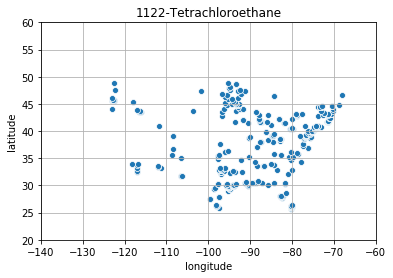

'parameter_name_12-Dichloropropane'

(449,)

(449,)

(449,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.210000
1,-80.326811,25.586384,0.092961
2,-80.210278,25.798333,0.930000
3,-80.258300,25.875830,0.211638
4,-97.493830,25.892518,0.039878


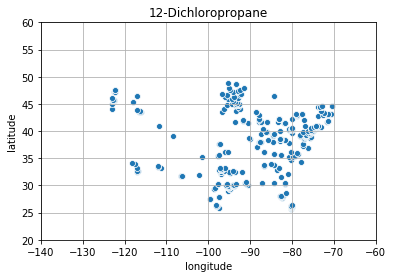

'parameter_name_13-Butadiene'

(770,)

(770,)

(770,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.780667
1,-64.793479,17.708308,0.131111
2,-64.784868,17.712474,0.154000
3,-64.780278,17.725278,0.159333
4,-66.150293,18.417315,0.544387


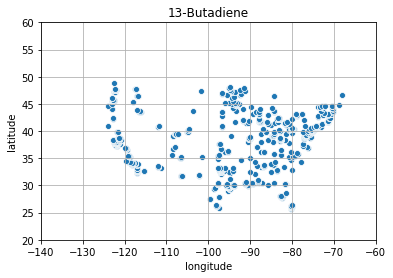

'parameter_name_Acetaldehyde'

(546,)

(546,)

(546,)

,longitude,latitude,intensity
0,0.000000,0.000000,3.282248
1,-66.150293,18.417315,4.486602
2,-66.580020,18.436764,1.987826
3,-157.969126,21.392833,1.453589
4,-80.210278,25.798333,1.388452


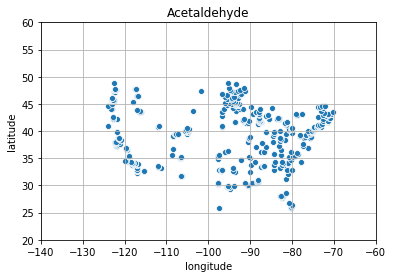

'parameter_name_Acrolein'

(427,)

(427,)

(427,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.183333
1,-64.793479,17.708308,1.613571
2,-64.784868,17.712474,1.795385
3,-64.780278,17.725278,2.129333
4,-66.150293,18.417315,1.342859


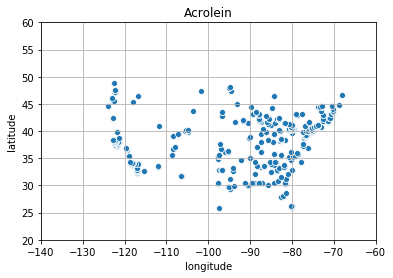

'parameter_name_Arsenic'

(1049,)

(1049,)

(1049,)

,longitude,latitude,intensity
0,-64.785278,17.714444,0.000969
1,-64.795972,18.334399,0.001000
2,-64.796389,18.336389,0.000308
3,-66.150615,18.420089,0.002000
4,-66.115846,18.425652,0.001544


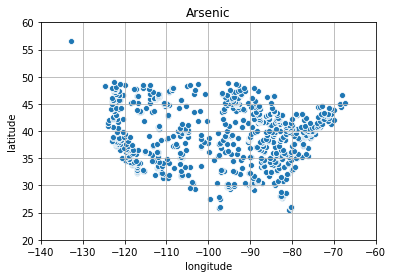

'parameter_name_Benzene'

(1020,)

(1020,)

(1020,)

,longitude,latitude,intensity
0,0.000000,0.000000,3.976541
1,-64.793479,17.708308,1.022667
2,-64.784868,17.712474,1.244375
3,-64.780278,17.725278,1.378235
4,-66.150293,18.417315,3.746570


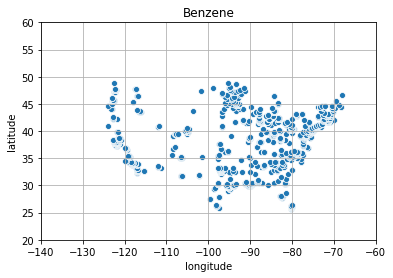

'parameter_name_Beryllium'

(359,)

(359,)

(359,)

,longitude,latitude,intensity
0,-157.969126,21.392833,0.101235
1,-82.465146,27.740033,0.742456
2,-82.739875,27.785866,0.143725
3,-82.714465,27.850348,0.093102
4,-82.538611,27.892222,0.382110


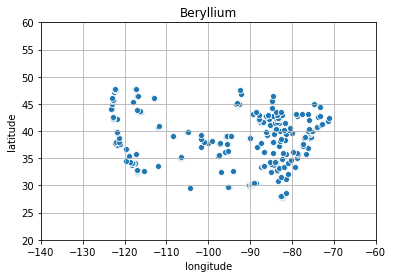

'parameter_name_Cadmium'

(920,)

(920,)

(920,)

,longitude,latitude,intensity
0,-64.785278,17.714444,0.003343
1,-66.150615,18.420089,0.002357
2,-66.115846,18.425652,0.005988
3,-158.088613,21.323745,0.006038
4,-157.969126,21.392833,0.003309


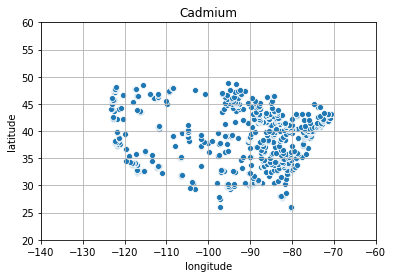

'parameter_name_Carbon'

(839,)

(839,)

(839,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.112720
1,-64.793479,17.708308,0.105333
2,-64.784868,17.712474,0.098125
3,-64.780278,17.725278,0.098824
4,-66.150293,18.417315,0.098293


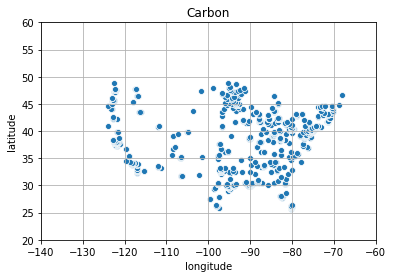

'parameter_name_Chloroform'

(781,)

(781,)

(781,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.051563
1,-64.793479,17.708308,0.023333
2,-64.784868,17.712474,0.020000
3,-64.780278,17.725278,0.020000
4,-66.150293,18.417315,0.077913


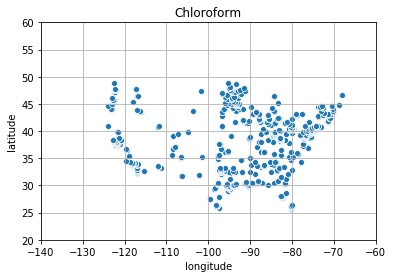

'parameter_name_Chromium'

(1189,)

(1189,)

(1189,)

,longitude,latitude,intensity
0,-64.785278,17.714444,0.001844
1,-66.611694,18.014281,0.003500
2,-64.795972,18.334399,0.001092
3,-64.796389,18.336389,0.000874
4,-66.150615,18.420089,0.001941


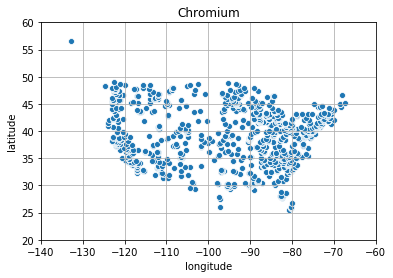

'parameter_name_Dichloromethane'

(825,)

(825,)

(825,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.678268
1,-64.793479,17.708308,0.085333
2,-64.784868,17.712474,0.082500
3,-64.780278,17.725278,0.066471
4,-66.150293,18.417315,0.785180


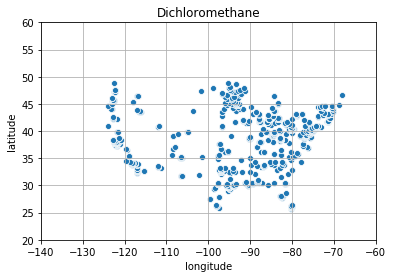

'parameter_name_Ethylene'

(599,)

(599,)

(599,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.456667
1,-64.793479,17.708308,0.032500
2,-64.784868,17.712474,0.034000
3,-64.780278,17.725278,0.032000
4,-66.150293,18.417315,0.070000


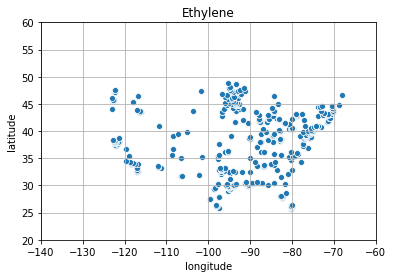

'parameter_name_Formaldehyde'

(535,)

(535,)

(535,)

,longitude,latitude,intensity
0,0.000000,0.000000,4.215252
1,-66.150293,18.417315,2.064333
2,-66.580020,18.436764,1.160917
3,-157.969126,21.392833,1.387724
4,-80.210278,25.798333,0.507581


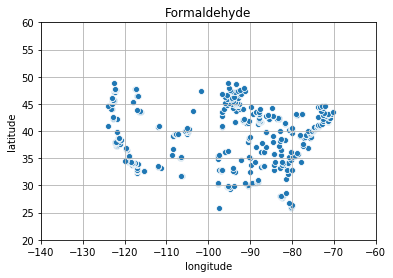

'parameter_name_Lead'

(875,)

(875,)

(875,)

,longitude,latitude,intensity
0,-64.785278,17.714444,0.001214
1,-64.795972,18.334399,0.001091
2,-64.796389,18.336389,0.001479
3,-66.150615,18.420089,0.002902
4,-66.115846,18.425652,0.003384


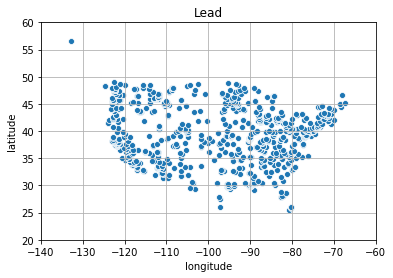

'parameter_name_Manganese'

(1166,)

(1166,)

(1166,)

,longitude,latitude,intensity
0,-64.785278,17.714444,0.002523
1,-66.611694,18.014281,0.041400
2,-64.795972,18.334399,0.004405
3,-64.796389,18.336389,0.003786
4,-66.150615,18.420089,0.002818


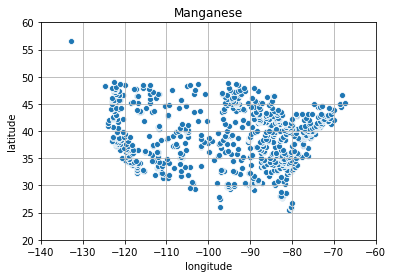

'parameter_name_Mercury'

(45,)

(45,)

(45,)

,longitude,latitude,intensity
0,-81.345347,28.551112,0.023303
1,-81.362500,28.596389,0.011191
2,-115.503056,32.673889,1.030769
3,-115.484144,32.676186,1.085185
4,-115.563060,32.792220,1.000000


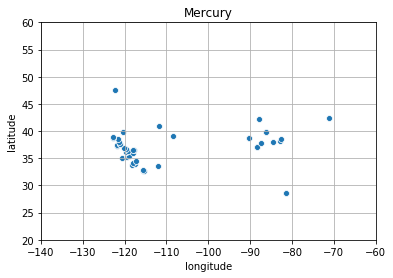

'parameter_name_Nickel'

(1148,)

(1148,)

(1148,)

,longitude,latitude,intensity
0,-64.785278,17.714444,0.001637
1,-66.611694,18.014281,0.008100
2,-64.795972,18.334399,0.001048
3,-64.796389,18.336389,0.000484
4,-66.150615,18.420089,0.001846


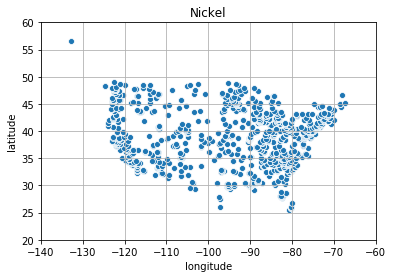

'parameter_name_Tetrachloroethylene'

(828,)

(828,)

(828,)

,longitude,latitude,intensity
0,0.000000,0.000000,0.218919
1,-64.793479,17.708308,0.028000
2,-64.784868,17.712474,0.024286
3,-64.780278,17.725278,0.048333
4,-66.150293,18.417315,0.094019


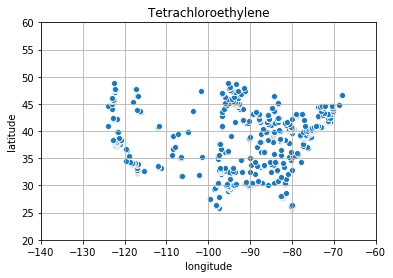

'parameter_name_Trichloroethylene'

(762,)

(762,)

(762,)

,longitude,latitude,intensity
0,0.000000,0.000000,1.050952
1,-64.793479,17.708308,0.020000
2,-64.784868,17.712474,0.020000
3,-64.780278,17.725278,0.020000
4,-66.150293,18.417315,3.784467


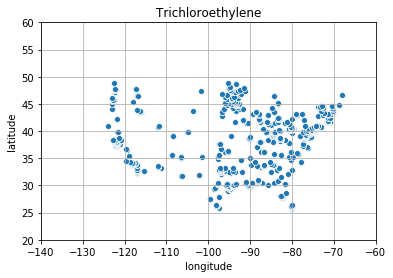

'parameter_name_Vinyl'

(520,)

(520,)

(520,)

,longitude,latitude,intensity
0,-64.793479,17.708308,0.010000
1,-64.784868,17.712474,0.010000
2,-64.780278,17.725278,0.035000
3,-66.150293,18.417315,0.024000
4,-66.580020,18.436764,0.046667


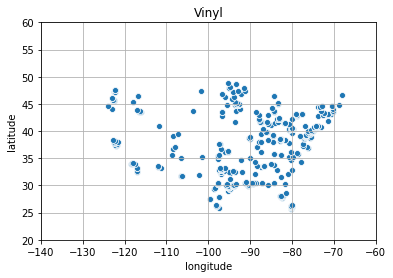

'parameter_name_cis-13-Dichloropropene'

(367,)

(367,)

(367,)

,longitude,latitude,intensity
0,-80.326811,25.586384,0.104336
1,-80.258300,25.875830,0.107736
2,-97.493830,25.892518,0.024230
3,-80.247778,25.982222,0.386552
4,-80.160556,26.000833,0.200219


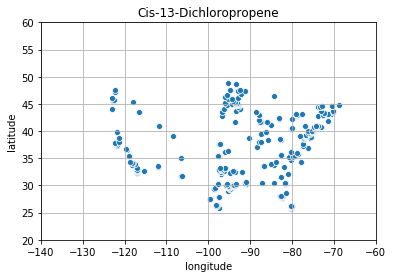

'parameter_name_trans-13-Dichloropropene'

(377,)

(377,)

(377,)

,longitude,latitude,intensity
0,-80.326811,25.586384,0.145944
1,-80.258300,25.875830,0.152571
2,-97.493830,25.892518,0.024269
3,-80.247778,25.982222,0.293548
4,-80.160556,26.000833,0.205220


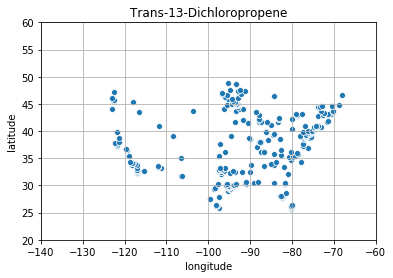

In [24]:
for c in pollutant_columns:
    display(c)
    mask = df[c].astype(bool)
    strata = df[['latitude', 'longitude', c]][mask]
    g = strata.groupby(['latitude', 'longitude']).mean()
    g['latitude'], g['longitude'] = zip(*g.index.values)
    
    display(g['longitude'].shape, g['latitude'].shape, g[c].shape)
    g = pd.DataFrame(np.array([g['longitude'].values, g['latitude'].values, g[c].values]).T,
                     columns='longitude latitude intensity'.split(), index=range(len(g)))
    display(g.head())

    fig, ax = plt.subplots()
    sns.scatterplot(data=g, x='longitude', y='latitude')
    pollutant = c[len('parameter_name_'):]
    plt.title(pollutant.title())
    plt.grid('on')
    plt.xlim((-140, -60))
    plt.ylim((20, 60))
    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    plt.show(block=False)
    
